In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
from pathlib import Path
import random

import torch
import torchvision as tv
from torchvision.transforms import v2 as transforms

import bb
import tt

LOG = logging.getLogger(__name__)
tt.logging_init()

SEED = 325
random.seed(SEED)

In [3]:
data_path = Path.home() / "src/data"
mc_data_path = data_path / "minecraft/info.json"
dset = bb.Dataset.load(mc_data_path)
torch_root = data_path / "torchvision"

IMAGES_PATH = str(torch_root / "COCO/val2017")
ANNOTATIONS_PATH = str(torch_root / "COCO/annotations/instances_val2017.json")

In [4]:
coco_dataset = tv.datasets.CocoDetection(IMAGES_PATH, ANNOTATIONS_PATH)
dataset = tv.datasets.wrap_dataset_for_transforms_v2(coco_dataset)

sample = dataset[0]
img, target = sample
print(type(img))
target

loading annotations into memory...
Done (t=0.15s)
creating index...
index created!
<class 'PIL.Image.Image'>


{'image_id': 139,
 'boxes': BoundingBoxes([[236.9800, 142.5100, 261.6800, 212.0100],
                [  7.0300, 167.7600, 156.3500, 262.6300],
                [557.2100, 209.1900, 638.5600, 287.9200],
                [358.9800, 218.0500, 414.9800, 320.8800],
                [290.6900, 218.0000, 352.5200, 316.4800],
                [413.2000, 223.0100, 443.3700, 304.3700],
                [317.4000, 219.2400, 338.9800, 230.8300],
                [412.8000, 157.6100, 465.8500, 295.6200],
                [384.4300, 172.2100, 399.5500, 207.9500],
                [512.2200, 205.7500, 526.9600, 221.7200],
                [493.1000, 174.3400, 513.3900, 282.6500],
                [604.7700, 305.8900, 619.1100, 351.6000],
                [613.2400, 308.2400, 626.1200, 354.6800],
                [447.7700, 121.1200, 461.7400, 143.0000],
                [549.0600, 309.4300, 585.7400, 399.1000],
                [350.7600, 208.8400, 362.1300, 231.3900],
                [412.2500, 219.0200, 421.8800

In [5]:
coco_categories = {
    cat["id"]: cat["name"] for cat in dataset.coco.loadCats(dataset.coco.getCatIds())
}
print(coco_categories)
label_names = [coco_categories[label.item()] for label in target["labels"]]
print(label_names)

{1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant', 13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat', 18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear', 24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag', 32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard', 37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove', 41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle', 46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon', 51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange', 56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut', 61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed', 67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse', 75: 'remote', 76: 'keyboard', 77: 'cell phone', 78: 'micro

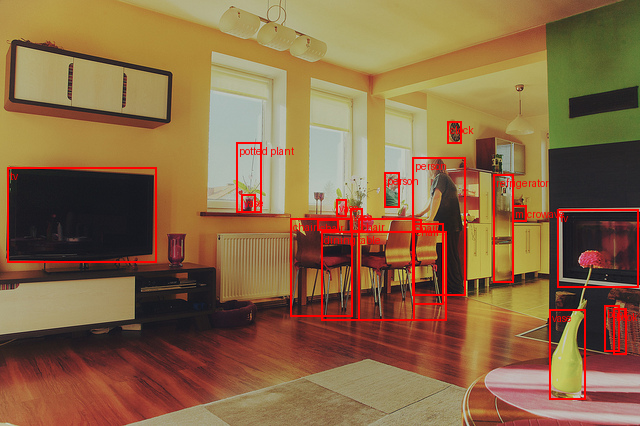

In [6]:
from torchvision import utils
img_tensor = transforms.functional.pil_to_tensor(img)
result = utils.draw_bounding_boxes(img_tensor, boxes=target["boxes"], labels=label_names, colors="red", width=2)
transforms.functional.to_pil_image(result)